In [1475]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib_venn import venn2


In [1476]:
df = pd.read_csv('data/train.csv')

In [1477]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1478]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1479]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


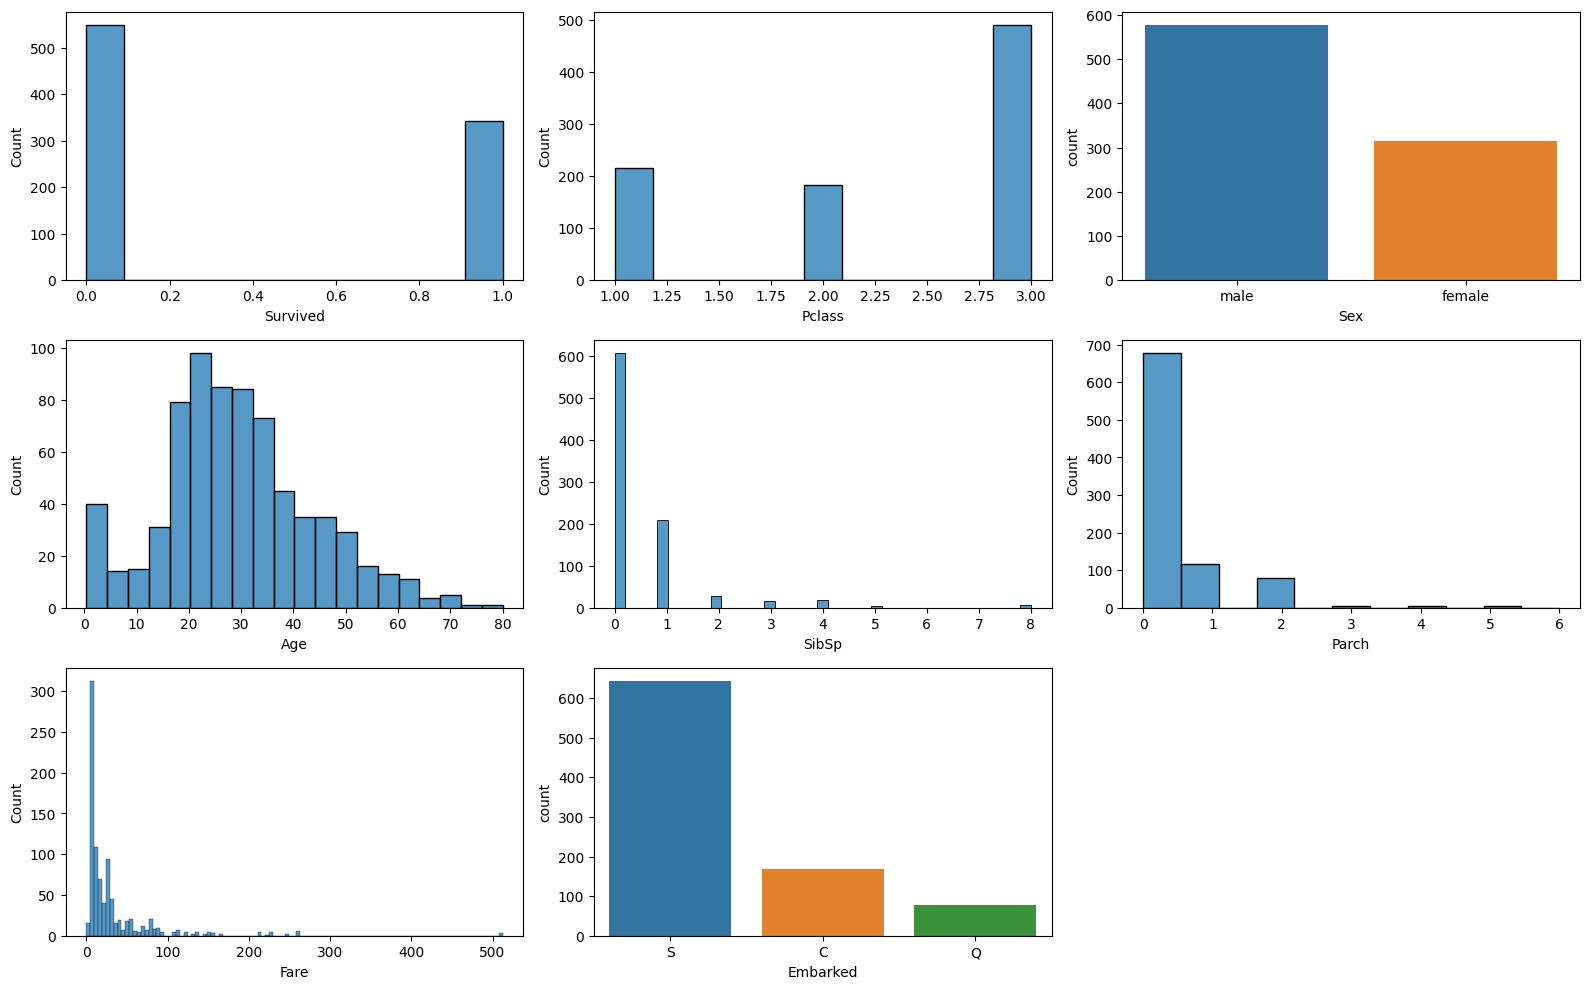

In [1480]:
# show distribution of data in each column (for categorical data) or histogram (for numerical data)

cols_to_plot = [x for x in df.columns if x not in ['Name', 'PassengerId', 'Ticket', 'Cabin']]

total = len(cols_to_plot) 
nrows = total // 4 + 1
ncols = total // nrows + 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

for i, col in enumerate(cols_to_plot):
    if df[col].dtype.name == 'category' or df[col].dtype.name == 'object':
        sns.countplot(x=col, data=df, ax=axes[i//ncols, i%ncols])
    else:
        sns.histplot(df[col], ax=axes[i//ncols, i%ncols])

# Hide any remaining empty subplots
for j in range(i + 1, nrows * ncols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


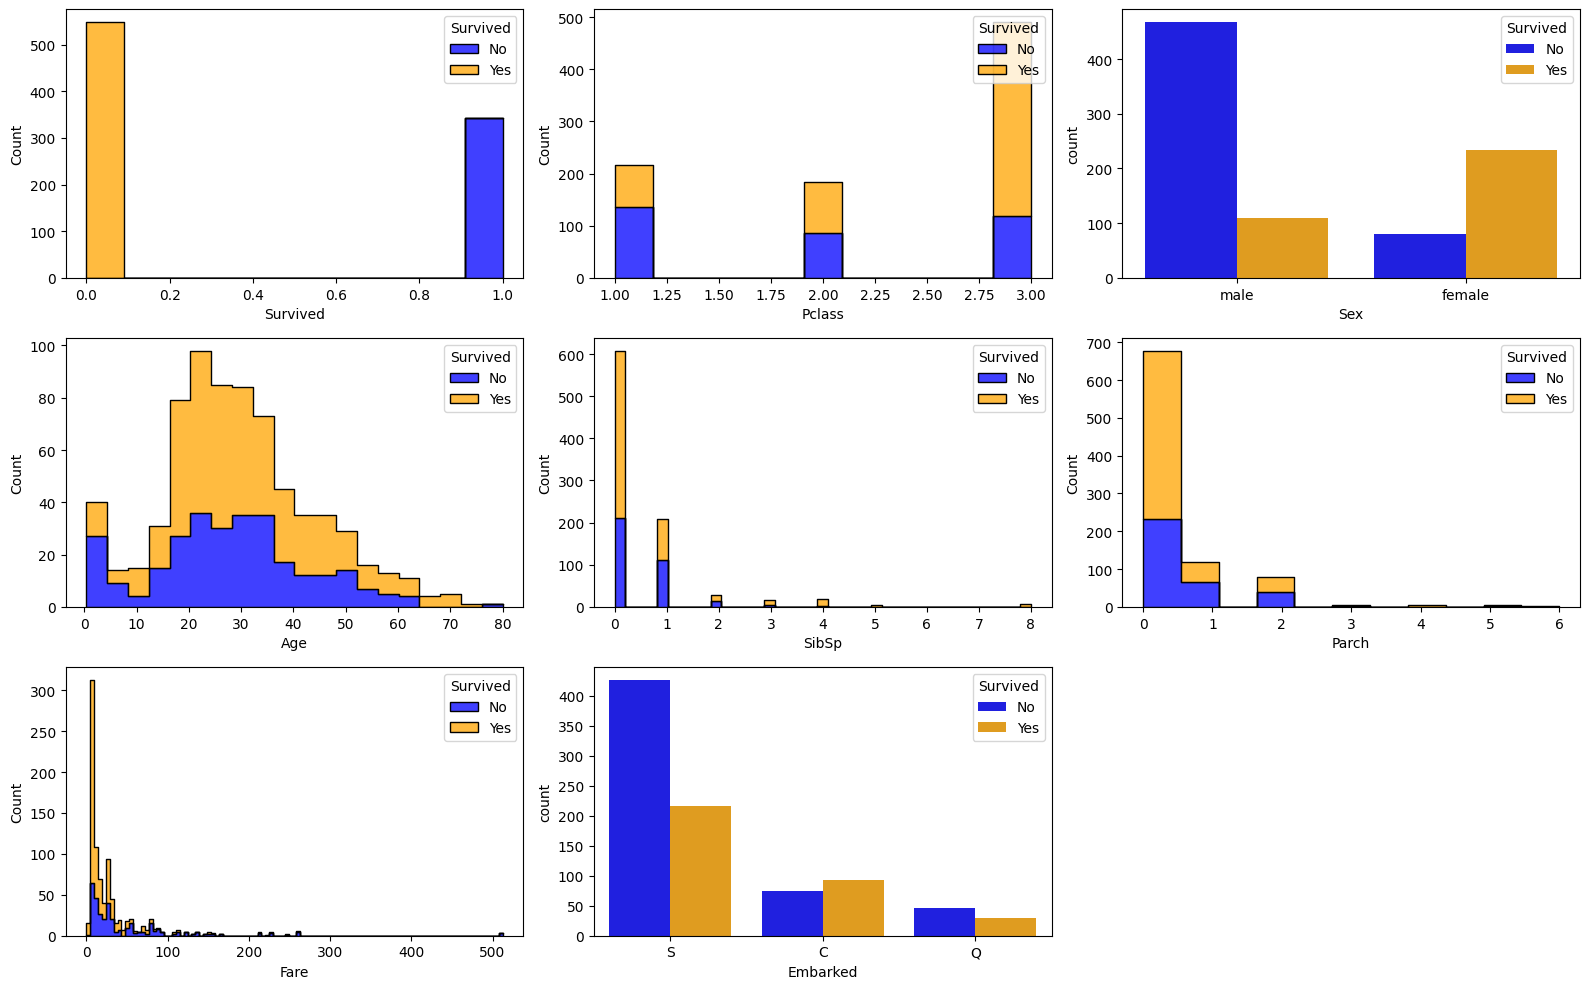

In [1481]:

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

for i, col in enumerate(cols_to_plot):
    if df[col].dtype.name == 'category' or df[col].dtype.name == 'object':
        ax = axes[i//ncols, i%ncols]
        sns.countplot(x=col, hue='Survived', data=df, ax=ax, palette={0: 'blue', 1: 'orange'})
        ax.legend(title='Survived', labels=['No', 'Yes'])
    else:
        ax = axes[i//ncols, i%ncols]
        sns.histplot(data=df, x=col, hue='Survived', ax=ax, multiple='stack', element='step', 
                     palette={0: 'orange', 1: 'blue'})
        ax.legend(title='Survived', labels=['No', 'Yes'])

# Hide any remaining empty subplots
for j in range(i + 1, nrows * ncols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()



In [1482]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

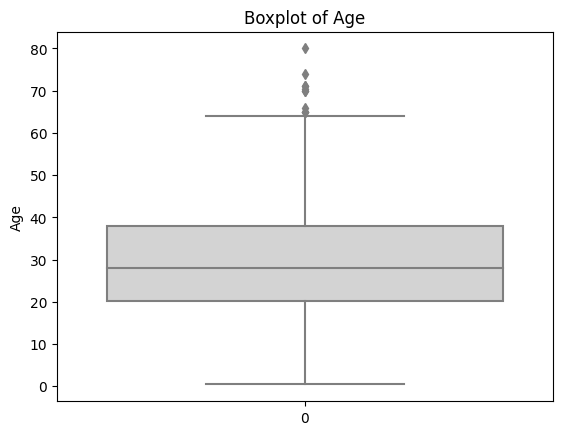

In [1483]:
sns.boxplot(df['Age'], orient='v', color='lightgray')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

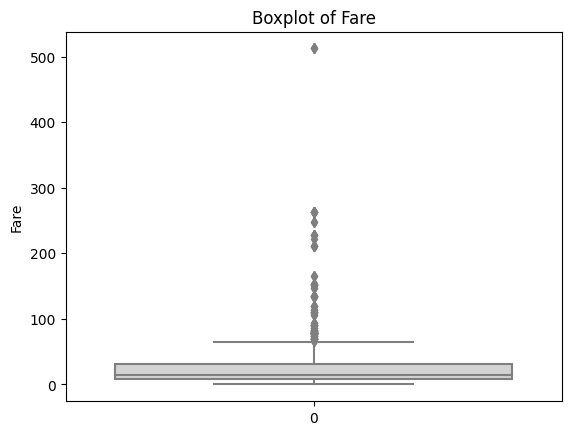

In [1484]:
sns.boxplot(df['Fare'], orient='v', color='lightgray')
plt.title('Boxplot of Fare')
plt.ylabel('Fare')
plt.show()

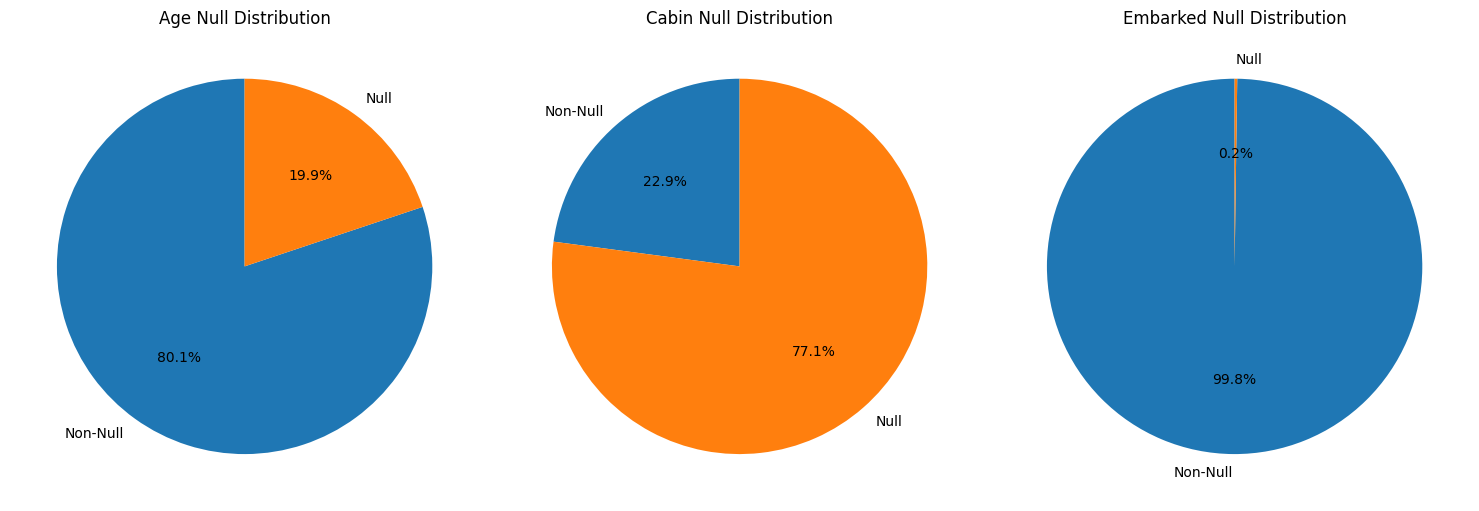

In [1485]:
# Calculate the count of non-null and null values for each column


non_null_counts = df[['Age', 'Cabin', 'Embarked']].notnull().sum()
null_counts = df.shape[0] - non_null_counts

# Create labels and sizes for the pie chart
labels = ['Non-Null', 'Null']
sizes_age = [non_null_counts['Age'], null_counts['Age']]
sizes_cabin = [non_null_counts['Cabin'], null_counts['Cabin']]
sizes_embarked = [non_null_counts['Embarked'], null_counts['Embarked']]

# Create subplots for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie charts for each column
axes[0].pie(sizes_age, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Age Null Distribution')

axes[1].pie(sizes_cabin, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Cabin Null Distribution')

axes[2].pie(sizes_embarked, labels=labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Embarked Null Distribution')

plt.tight_layout()
plt.show()

# Feature Engineering 

In [1486]:
df[df.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Extracting Titles from the Name

In [1487]:
title_list = [
    'Mr', 'Mrs', 'Miss', 'Rev', 'Ms', 'Dr', 'Lady', 'Master', 'Don', 'Mme', 
    'Major', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'
]


In [1488]:
df['FamilyName'] = df['Name'].apply(lambda x: x.split(',')[0])
df['FirstName'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[1].strip())
df['MappedTitle'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [1489]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,MappedTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr


<Axes: xlabel='MappedTitle', ylabel='Age'>

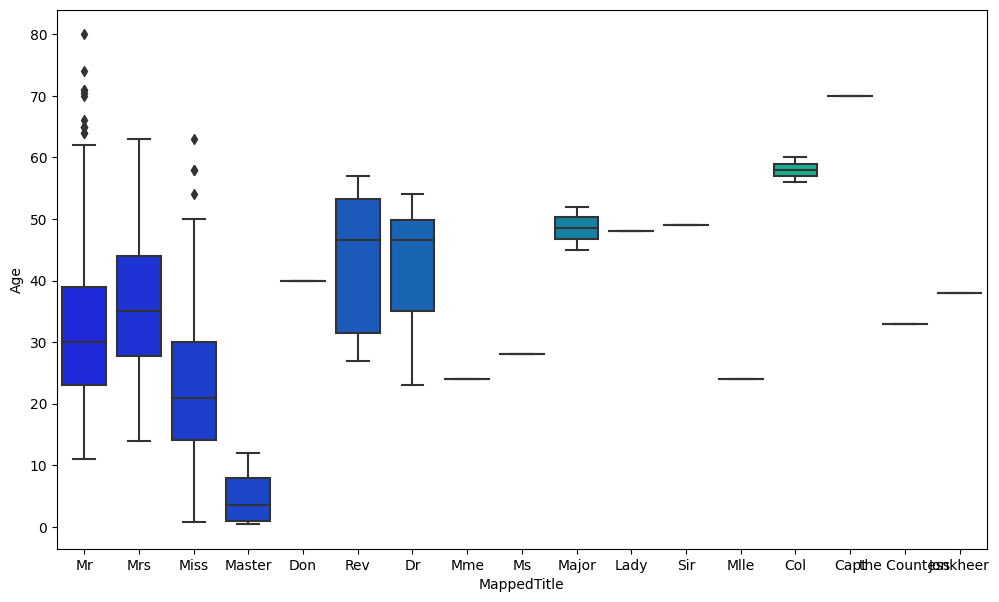

In [1490]:
# Plot unique values of Title column with age


plt.figure(figsize=(12, 7))
sns.boxplot(x='MappedTitle', y='Age', data=df, palette='winter')


In [1491]:
# Title mapping dictionary with age and sex conditions
title_mapping = {
    'Mr': ('male', 18, np.inf),
    'Mrs': ('female', 18, np.inf),
    'Miss': ('female', 0, 18),
    'Master': ('male', 0, 18),
    'Rev': ('male', 18, np.inf),
    'Ms': ('female', 18, np.inf),
    'Dr': ('male', 18, np.inf),
    'Dr': ('female', 18, np.inf),
    'Lady': ('female', 18, np.inf),
    'Don': ('male', 18, np.inf),
    'Mme': ('female', 18, np.inf),
    'Major': ('male', 18, np.inf),
    'Sir': ('male', 18, np.inf),
    'Mlle': ('female', 18, np.inf),
    'Col': ('male', 18, np.inf),
    'Capt': ('male', 18, np.inf),
    'Countess': ('female', 18, np.inf),
    'Jonkheer': ('male', 18, np.inf)
}


# Function to map title based on conditions
def map_title(row):
    if pd.isnull(row['Age']):
        mapped_title = row['MappedTitle']
        sex = row['Sex']
        for title, (title_sex, min_age, max_age) in title_mapping.items():
            if title == 'Dr':
                if sex in ['male', 'female'] and mapped_title == 'Dr':
                    mapped_title = 'Mr' if sex == 'male' else 'Mrs'
                    break
            elif title_sex == sex and min_age <= row['Age'] <= max_age:
                mapped_title = title
                break
    else:
        sex = row['Sex']
        age = row['Age']
        for title, (title_sex, min_age, max_age) in title_mapping.items():
            if title == 'Dr':
                if sex in ['male', 'female'] and min_age <= age <= max_age:
                    mapped_title = 'Mr' if sex == 'male' else 'Mr'
                    break
            elif title_sex == sex and min_age <= age <= max_age:
                mapped_title = title
                break
    return mapped_title

df['Title'] = df.apply(map_title, axis=1)

### Age Group Based on the above analysis

In [1492]:
def group_age(title):
    if title == "Mr" or  title == "Mr":
        return "Adult"
    else:
        return "Children"

df['AgeGroup'] = df['Title'].apply(lambda x: group_age(x))

In [1493]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Master', 'Miss'], dtype=object)

In [1494]:
# Fill the missing ages with the median age of the title group

df.loc[(df['AgeGroup'] == 'Children') & (df['Age'].isnull()), 'Age'] = float(round(df[df['AgeGroup'] == 'Children']['Age'].median()))
df.loc[(df['AgeGroup'] == 'Adult') & (df['Age'].isnull()), 'Age'] = float(round(df[df['AgeGroup'] == 'Adult']['Age'].median()))

df.drop('MappedTitle', axis=1, inplace=True)

<Axes: xlabel='Title', ylabel='Age'>

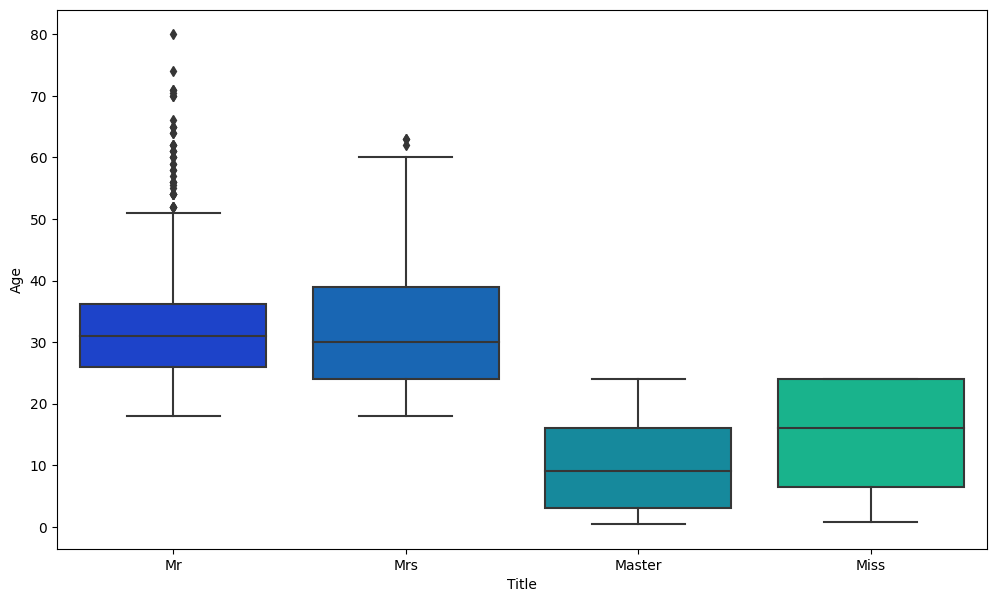

In [1495]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Title', y='Age', data=df, palette='winter')

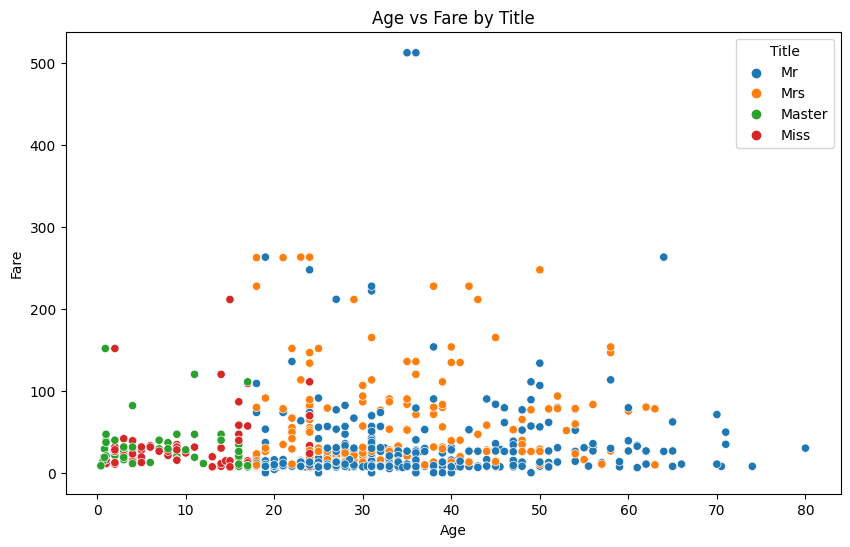

In [1496]:
# plot age and fare group by title scatter

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Title', data=df)
plt.title("Age vs Fare by Title")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title='Title')
plt.show()

<Axes: xlabel='Title', ylabel='count'>

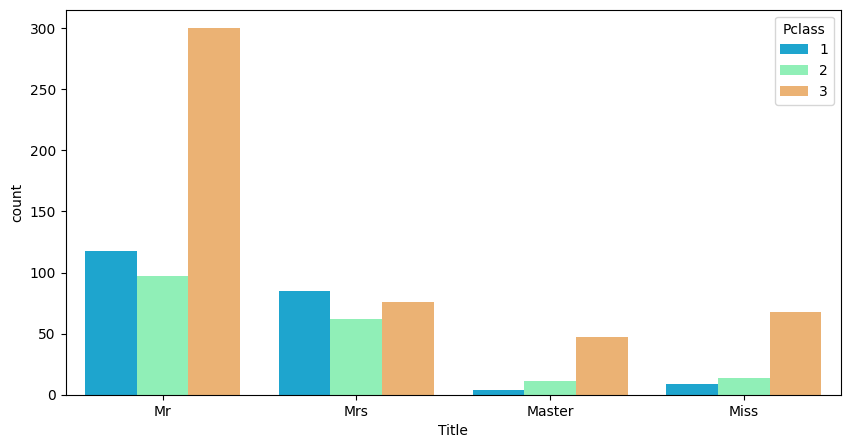

In [1497]:
#plot Title Vs Pclass and number of passengers survived

plt.figure(figsize=(10,5))
sns.countplot(x='Title',hue='Pclass',data=df,palette='rainbow')

In [1498]:
sib_g3 = df[df['SibSp'] > 3].groupby('FamilyName').apply(lambda x: x)
sib_g3

PassengerId  Survived  Pclass  \
FamilyName                                      
Andersson  68            69         1       3   
           119          120         0       3   
           541          542         0       3   
           542          543         0       3   
           813          814         0       3   
           850          851         0       3   
Asplund    182          183         0       3   
           233          234         1       3   
           261          262         1       3   
Goodwin    59            60         0       3   
           71            72         0       3   
           386          387         0       3   
           480          481         0       3   
           683          684         0       3   
Panula     50            51         0       3   
           164          165         0       3   
           266          267         0       3   
           686          687         0       3   
           824          825         0       3   
Rice       16            17         0       3   
           171          172         0       3   
           278          279         0       3   
           787          788         0       3   
Sage       159          160         0       3   
           180          181         0       3   
           201          202         0       3   
           324          325         0       3   
           792          793         0       3   
           846          847         0       3   
           863          864         0       3   

                                                   Name     Sex   Age  SibSp  \
FamilyName                                                                     
Andersson  68           Andersson, Miss. Erna Alexandra  female  17.0      4   
           119        Andersson, Miss. Ellis Anna Maria  female   2.0      4   
           541     Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
           542        Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
           813       Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
           850  Andersson, Master. Sigvard Harald Elias    male   4.0      4   
Asplund    182    Asplund, Master. Clarence Gustaf Hugo    male   9.0      4   
           233           Asplund, Miss. Lillian Gertrud  female   5.0      4   
           261        Asplund, Master. Edvin Rojj Felix    male   3.0      4   
Goodwin    59        Goodwin, Master. William Frederick    male  11.0      5   
           71                Goodwin, Miss. Lillian Amy  female  16.0      5   
           386          Goodwin, Master. Sidney Leonard    male   1.0      5   
           480           Goodwin, Master. Harold Victor    male   9.0      5   
           683              Goodwin, Mr. Charles Edward    male  14.0      5   
Panula     50                Panula, Master. Juha Niilo    male   7.0      4   
           164             Panula, Master. Eino Viljami    male   1.0      4   
           266                Panula, Mr. Ernesti Arvid    male  16.0      4   
           686                 Panula, Mr. Jaako Arnold    male  14.0      4   
           824             Panula, Master. Urho Abraham    male   2.0      4   
Rice       16                      Rice, Master. Eugene    male   2.0      4   
           171                     Rice, Master. Arthur    male   4.0      4   
           278                       Rice, Master. Eric    male   7.0      4   
           787                Rice, Master. George Hugh    male   8.0      4   
Sage       159               Sage, Master. Thomas Henry    male  24.0      8   
           180             Sage, Miss. Constance Gladys  female  24.0      8   
           201                      Sage, Mr. Frederick    male  31.0      8   
           324                 Sage, Mr. George John Jr    male  31.0      8   
           792                  Sage, Miss. Stella Anna  female  24.0      8   
           846                 Sage, Mr. Dougla

In [1499]:
df[df['FamilyName'] == 'West']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S,West,Constance Mirium,Miss,Children
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S,West,Edwy Arthur,Mr,Adult
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S,West,Edwy Arthur (Ada Mary Worth),Mrs,Children


In [1500]:
df[df['Parch'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,Children
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Mrs,Children
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,Children
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Henry Jr,Mr,Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Juozas,Mr,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Margaret Edith,Mrs,Children
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Karl Howell,Mr,Adult


### Genric Update on Family counts, based on the Family Name and Ticket. 
#### The idea is to group in one family i.e Stepson, Stepdaughter, Nany etc

In [1501]:
def update_family_counts(row):
    family_name = row['FamilyName']
    ticket = row['Ticket']
    num_children = df[(df['FamilyName'] == family_name) & (df['Title'].isin(['Miss', 'Master'])) | (df['Ticket'] == ticket) & (df['Title'].isin(['Miss', 'Master']))].shape[0]
    num_adults = df[(df['FamilyName'] == family_name) & (df['Title'].isin(['Mr', 'Mrs'])) | (df['Ticket'] == ticket) & (df['Title'].isin(['Mr', 'Mrs']))].shape[0]
    
    row['SibSp'] = num_children
    row['Parch'] = num_adults
    row['FamilySize'] = num_children + num_adults 
    return row


df = df.apply(update_family_counts, axis=1)

In [1502]:
def categorize_family_size(size):
    if size == 1:
        return "Alone"
    elif 1 <= size <= 3:
        return "Medium"
    else:
        return "Large"

df['FamilyCategory'] = df['FamilySize'].apply(categorize_family_size)

In [1503]:
df[df['SibSp'] > 3].groupby('FamilyName').apply(lambda x: x)

PassengerId  Survived  Pclass  \
FamilyName                                      
Andersson  13            14         0       3   
           68            69         1       3   
           119          120         0       3   
           146          147         1       3   
           541          542         0       3   
           542          543         0       3   
           610          611         0       3   
           813          814         0       3   
           850          851         0       3   
Goodwin    59            60         0       3   
           71            72         0       3   
           386          387         0       3   
           480          481         0       3   
           678          679         0       3   
           683          684         0       3   
Lefebre    176          177         0       3   
           229          230         0       3   
           409          410         0       3   
           485          486         0       3   
Panula     50            51         0       3   
           164          165         0       3   
           266          267         0       3   
           638          639         0       3   
           686          687         0       3   
           824          825         0       3   
Rice       16            17         0       3   
           171          172         0       3   
           278          279         0       3   
           787          788         0       3   
           885          886         0       3   
Sage       159          160         0       3   
           180          181         0       3   
           201          202         0       3   
           324          325         0       3   
           792          793         0       3   
           846          847         0       3   
           863          864         0       3   
Skoog      63            64         0       3   
           167          168         0       3   
           360          361         0       3   
           634          635         0       3   
           642          643         0       3   
           819          820         0       3   

                                                             Name     Sex  \
FamilyName                                                                  
Andersson  13                         Andersson, Mr. Anders Johan    male   
           68                     Andersson, Miss. Erna Alexandra  female   
           119                  Andersson, Miss. Ellis Anna Maria  female   
           146       Andersson, Mr. August Edvard ("Wennerstrom")    male   
           541               Andersson, Miss. Ingeborg Constanzia  female   
           542                  Andersson, Miss. Sigrid Elisabeth  female   
           610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female   
           813                 Andersson, Miss. Ebba Iris Alfrida  female   
           850            Andersson, Master. Sigvard Harald Elias    male   
Goodwin    59                  Goodwin, Master. William Frederick    male   
           71                          Goodwin, Miss. Lillian Amy  female   
           386                    Goodwin, Master. Sidney Leonard    male   
           480                     Goodwin, Master. Harold Victor    male   
           678            Goodwin, Mrs. Frederick (Augusta Tyler)  female   
           683                        Goodwin, Mr. Charles Edward    male   
Lefebre    176                      Lefebre, Master. Henry Forbes    male   
           229                            Lefebre, Miss. Mathilde  female   
           409                                 Lefebre, Miss. Ida  female   
           485                             Lefebre, Miss. Jeannie  female   
Panula     50                          Panula, Master. Juha Niilo    male   
           164                       Panula, Master. Eino Viljami    male   
           266                         

In [1504]:
df[df['FamilyName'] == 'Sage'].count()

PassengerId       7
Survived          7
Pclass            7
Name              7
Sex               7
Age               7
SibSp             7
Parch             7
Ticket            7
Fare              7
Cabin             0
Embarked          7
FamilyName        7
FirstName         7
Title             7
AgeGroup          7
FamilySize        7
FamilyCategory    7
dtype: int64

### Fare 

In [1505]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,3,PC 17755,512.3292,NaN,C,Ward,Anna,Mrs,Children,3,Medium
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,3,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Thomas Drake Martinez,Mr,Adult,3,Medium
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,3,PC 17755,512.3292,B101,C,Lesurer,Gustave J,Mr,Adult,3,Medium


In [1506]:
# passengers who have 0 fare
df[(df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,4,LINE,0.0,NaN,S,Leonard,Lionel,Mr,Adult,4,Large
263,264,0,1,"Harrison, Mr. William",male,40.0,0,1,112059,0.0,B94,S,Harrison,William,Mr,Adult,1,Alone
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,4,LINE,0.0,NaN,S,Tornquist,William Henry,Mr,Adult,4,Large
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,31.0,0,3,239853,0.0,NaN,S,Parkes,"Francis ""Frank""",Mr,Adult,3,Medium
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,2,6,LINE,0.0,NaN,S,Johnson,William Cahoone Jr,Mr,Adult,8,Large
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,31.0,0,3,239853,0.0,NaN,S,Cunningham,Alfred Fleming,Mr,Adult,3,Medium
466,467,0,2,"Campbell, Mr. William",male,31.0,0,3,239853,0.0,NaN,S,Campbell,William,Mr,Adult,3,Medium
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,31.0,0,1,239854,0.0,NaN,S,Frost,"Anthony Wood ""Archie""",Mr,Adult,1,Alone
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,2,6,LINE,0.0,NaN,S,Johnson,Alfred,Mr,Adult,8,Large
633,634,0,1,"Parr, Mr. William Henry Marsh",male,31.0,0,1,112052,0.0,NaN,S,Parr,William Henry Marsh,Mr,Adult,1,Alone


In [1507]:
def create_ticket_to_fare_mapping(df):
    duplicate_tickets = df[df['Fare'] != 0].groupby('Ticket')['Fare'].max()
    ticket_to_fare = duplicate_tickets.to_dict()
    return ticket_to_fare

def fill_fare(row, ticket_to_fare):
    if row['Fare'] == 0:
        if row['Ticket'] in ticket_to_fare:
            return ticket_to_fare[row['Ticket']]
        elif row['Pclass'] == 1:
            return df[df['Pclass'] == 1]['Fare'].mode().iloc[0]
        elif row['Pclass'] == 2:
            return df[df['Pclass'] == 2]['Fare'].mode().iloc[0]
        elif row['Pclass'] == 3:
            return df[df['Pclass'] == 3]['Fare'].mode().iloc[0]
    return row['Fare']

ticket_to_fare_mapping = create_ticket_to_fare_mapping(df)
df['Fare'] = df.apply(lambda row: fill_fare(row, ticket_to_fare_mapping), axis=1)


In [1508]:
df[(df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory


In [1509]:
df[(df['Ticket'] == '112050')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,2,112050,26.55,A36,S,Andrews,Thomas Jr,Mr,Adult,2,Medium


In [1510]:
df[df['FamilyName'] == 'Andrews']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,0,4,13502,77.9583,D7,S,Andrews,Kornelia Theodosia,Mrs,Children,4,Large
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,2,112050,26.5500,A36,S,Andrews,Thomas Jr,Mr,Adult,2,Medium


In [1511]:
# passengers whoes ticket numbers are same but fares are different
df[df['Ticket'].duplicated(keep=False) & ~df['Fare'].duplicated(keep=False)].sort_values(by='Fare', ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,1,1,7534,9.2167,NaN,S,Osen,Olaf Elon,Master,Children,2,Medium
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,1,4,7534,9.8458,NaN,S,Gustafsson,Alfred Ossian,Mr,Adult,5,Large


In [1512]:
df[df['Ticket'].duplicated(keep=False) & (df['Fare'].duplicated(keep=False)) & (df['Cabin'].duplicated(keep=False)) & (df['FamilySize'] == 1) &(df['Survived'] == 1)].sort_values(by=['Ticket'] ) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory


In [1513]:
df[df['Ticket'] == '113781']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,2,2,113781,151.55,C22 C26,S,Allison,Helen Loraine,Miss,Children,4,Large
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,2,2,113781,151.55,C22 C26,S,Allison,Hudson Trevor,Master,Children,4,Large
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,2,2,113781,151.55,C22 C26,S,Allison,Hudson J C (Bessie Waldo Daniels),Mrs,Children,4,Large
708,709,1,1,"Cleaver, Miss. Alice",female,22.00,2,2,113781,151.55,NaN,S,Cleaver,Alice,Mrs,Children,4,Large


<Axes: xlabel='Pclass', ylabel='Fare'>

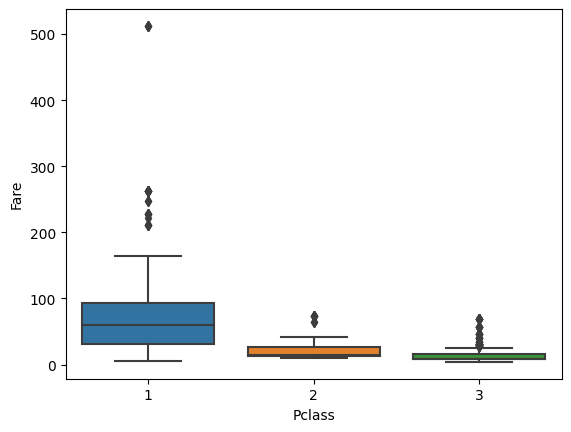

In [1514]:
# box plot of fare and pclass
sns.boxplot(x='Pclass', y='Fare', data=df)

In [1515]:
ticket_counts = df['Ticket'].value_counts()
df['FarePerPerson'] = df['Fare'] / ticket_counts[df['Ticket']].values

<Axes: xlabel='FamilySize', ylabel='count'>

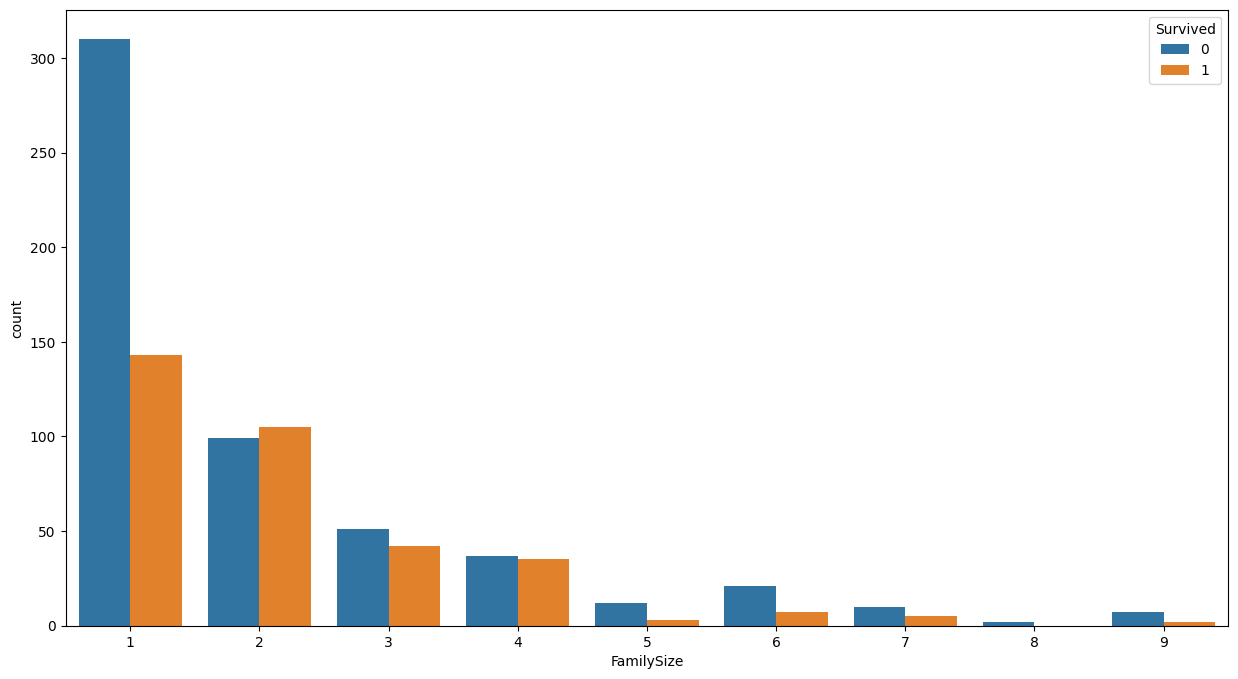

In [1516]:
# plot Distribution of the data of FamilySize
plt.figure(figsize=(15,8))
sns.countplot(x='FamilySize', data=df, hue='Survived')

<Axes: xlabel='Pclass', ylabel='FarePerPerson'>

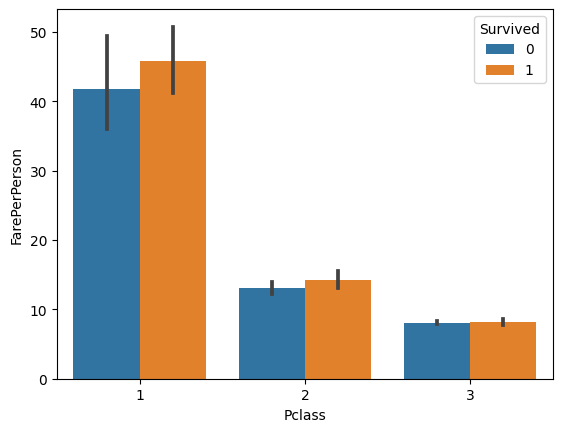

In [1517]:
#Plot FarePerPerson vs Survived for each Pclass

sns.barplot(x='Pclass', y='FarePerPerson', hue='Survived', data=df)

### Cabin

In [1518]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

df['CabinLetter'] = df['Cabin'].apply(lambda x: str(x)[0])


In [1519]:
def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(df, "CabinLetter")

,Total,Percent
CabinLetter,,
U,687,77.10
C,59,6.62
B,47,5.27
D,33,3.70
E,32,3.59
A,15,1.68
F,13,1.46
G,4,0.45
T,1,0.11


In [1520]:
df.groupby("CabinLetter")['Fare'].mean().sort_values()

CabinLetter
G     13.581250
F     18.696792
U     19.395025
T     35.500000
A     41.393887
E     46.026694
D     57.244576
C    100.151341
B    114.635551
Name: Fare, dtype: float64

In [1521]:
print(df.loc[df['Pclass'] == 1]['Fare'].describe())

print(df.loc[df['Pclass'] == 2]['Fare'].describe())

print(df.loc[df['Pclass'] == 3]['Fare'].describe())

count    216.000000
mean      84.769271
std       77.817576
min        5.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      21.086096
std       12.952730
min       10.500000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.741131
std       11.723991
min        4.012500
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [1522]:
# get unique cabine names where passengers survived in first class
fare = df['Fare']
unknown_cabin = df[df['Cabin'] == 'Unknown']
survived_1st_cabin = df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (91 < fare) & (fare <= 513) ]['Cabin'].unique()

# get unique cabin names where passengers died in first class
died_1st_cabin = df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (91 < fare) & (fare <= 513)]['Cabin'].unique()

print('Survived in first class: ', survived_1st_cabin)
print('Survived in first class: ', survived_1st_cabin.shape[0])
print('Died in first class: ', died_1st_cabin)
print('Died in first class: ', died_1st_cabin.shape[0])


print('Overlap: ', np.intersect1d(survived_1st_cabin, died_1st_cabin))



print('Survived Overlapped: ', df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Cabin'].isin(np.intersect1d(survived_1st_cabin, died_1st_cabin)))]['Cabin'].count())

print('Died Overlapped: ', df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Cabin'].isin(np.intersect1d(survived_1st_cabin, died_1st_cabin)))]['Cabin'].count())

Survived in first class:  ['B78' 'C23 C25 C27' 'B80' 'D36' 'Unknown' 'C125' 'C99' 'B49' 'B58 B60'
 'C22 C26' 'C65' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'E40' 'B96 B98' 'B73'
 'C70' 'C68' 'B51 B53 B55' 'B5' 'C62 C64' 'C45' 'B101' 'B3' 'B69']
Survived in first class:  27
Died in first class:  ['C23 C25 C27' 'B58 B60' 'C22 C26' 'C91' 'Unknown' 'C82' 'C65' 'C95' 'C86'
 'D48' 'C68']
Died in first class:  11
Overlap:  ['B58 B60' 'C22 C26' 'C23 C25 C27' 'C65' 'C68' 'Unknown']
Survived Overlapped:  25
Died Overlapped:  28


In [1523]:
# get unique cabine names where passengers survived in first class
survived_2nd_cabin =df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (fare <=74) ]['Cabin'].unique()

# get unique cabin names where passengers died in first class
died_2nd_cabin = df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (fare <=74) ]['Cabin'].unique()

print('Survived in Second class: ', survived_2nd_cabin)
print('Survived in Second class: ', survived_2nd_cabin.shape[0])
print('Died in Second class: ', died_2nd_cabin)
print('Died in Second class: ', died_2nd_cabin.shape[0])


print('Overlap: ', np.intersect1d(survived_2nd_cabin, died_2nd_cabin))



print('Survived Overlapped: ', df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Cabin'].isin(np.intersect1d(survived_2nd_cabin, died_2nd_cabin)))]['Cabin'].count())

print('Died Overlapped: ', df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Cabin'].isin(np.intersect1d(survived_2nd_cabin, died_2nd_cabin)))]['Cabin'].count())

Survived in Second class:  ['Unknown' 'D56' 'F33' 'E101' 'F4' 'F2' 'D']
Survived in Second class:  7
Died in Second class:  ['Unknown' 'F2' 'D' 'E77']
Died in Second class:  4
Overlap:  ['D' 'F2' 'Unknown']
Survived Overlapped:  78
Died Overlapped:  96


In [1524]:
# get unique cabine names where passengers survived in first class
survived_3rd_cabin = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Fare'] <=70) ]['Cabin'].unique()


# get unique cabin names where passengers died in first class
died_3rd_cabin = df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Fare'] <=70) ]['Cabin'].unique()

print('Survived in third class: ', survived_3rd_cabin)
print('Survived in third class: ', survived_3rd_cabin.shape[0])
print('Died in third class: ', died_3rd_cabin)
print('Died in third class: ', died_3rd_cabin.shape[0])


print('Overlap: ', np.intersect1d(survived_3rd_cabin, died_3rd_cabin))



print('Survived Overlapped: ', df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Cabin'].isin(np.intersect1d(survived_3rd_cabin, died_3rd_cabin)))]['Cabin'].count())

print('Died Overlapped: ', df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Cabin'].isin(np.intersect1d(survived_3rd_cabin, died_3rd_cabin)))]['Cabin'].count())



Survived in third class:  ['Unknown' 'G6' 'F E69' 'E10' 'E121']
Survived in third class:  5
Died in third class:  ['Unknown' 'F G73' 'G6' 'F G63' 'F38']
Died in third class:  5
Overlap:  ['G6' 'Unknown']
Survived Overlapped:  115
Died Overlapped:  368


In [1525]:
def fill_cabin(row,df):
    if row['Cabin'] == 'Unknown' and row['Pclass'] in [1, 2, 3]:
        class_condition = row['Pclass']
        fare = row['Fare']
        duplicate_tickets = df[(df['Ticket'] == row['Ticket']) & (df['Cabin'] != 'Unknown')]['Cabin']
        family_members_cabins = df[(df['FamilyName'] == row['FamilyName']) & (df['Cabin'] != 'Unknown')]['Cabin']
        if duplicate_tickets.any():
            return duplicate_tickets.iloc[0]
        
        elif family_members_cabins.any():
            return family_members_cabins.iloc[0]
        else:
            if class_condition == 1:
                if fare <= 55:
                    return 'C123'
                elif (55 < fare) & (fare <= 75):
                    return np.random.choice(['B22','C2','E44'])
                elif (75 < fare) & (fare <= 91):
                    return np.random.choice(['C78','C83','E67'])
                else:
                    return np.random.choice(['B58 B60','C22 C26','C23 C25 C27','C65','C68'])
            elif class_condition == 2:
                if fare > 13:
                    return 'D'
                else:
                    return 'F2'
            elif class_condition == 3:
                return 'G6'
        
    return row['Cabin']

df['Cabin'] = df.apply(lambda x: fill_cabin(x,df), axis=1)
df['CabinLetter'] = df['Cabin'].apply(lambda cabin: cabin[0] if cabin != 'Unknown' else 'Unknown')

In [1526]:
df[df['Cabin'] == 'B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory,FarePerPerson,CabinLetter
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,2,4,244252,26.0,B96 B98,S,Carter,Ernest Courtenay,Mr,Adult,6,Large,13.0,B
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,2,4,113760,120.0,B96 B98,S,Carter,William Ernest,Mr,Adult,6,Large,30.0,B
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,2,4,113760,120.0,B96 B98,S,Carter,Lucile Polk,Miss,Children,6,Large,30.0,B
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,2,4,113760,120.0,B96 B98,S,Carter,William Ernest (Lucile Polk),Mrs,Children,6,Large,30.0,B
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,2,4,113760,120.0,B96 B98,S,Carter,William Thornton II,Master,Children,6,Large,30.0,B
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,2,4,244252,26.0,B96 B98,S,Carter,Ernest Courtenay (Lilian Hughes),Mrs,Children,6,Large,13.0,B


<Axes: xlabel='Pclass', ylabel='FarePerPerson'>

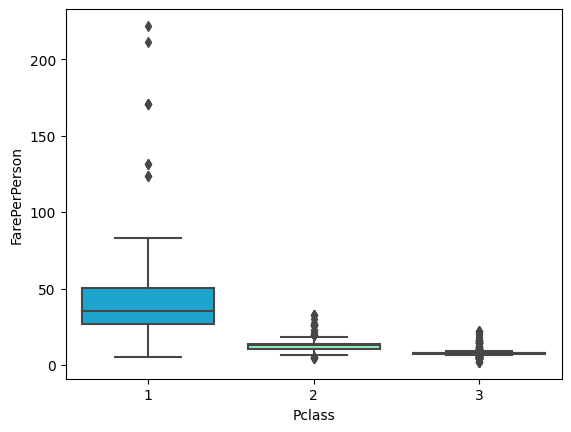

In [1527]:
# Plot the distribution of Fare for each Pclass

sns.boxplot(x='Pclass', y='FarePerPerson', data=df, palette='rainbow')

In [1528]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

c:\Users\jatin\.conda\envs\titanic\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


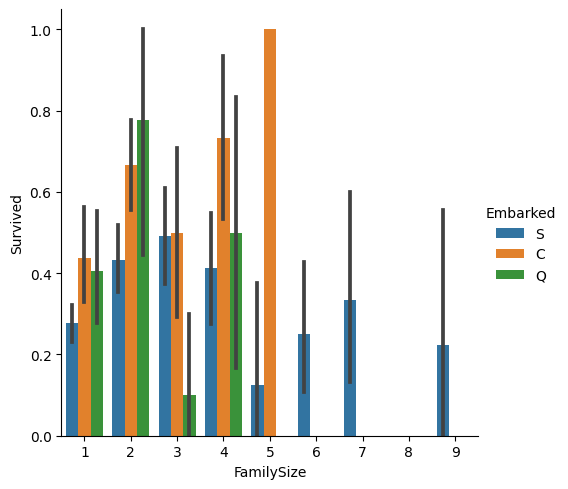

In [1529]:
# Plot same family size and port of embarkation
sns.catplot(x="FamilySize", y="Survived", hue="Embarked", kind="bar", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

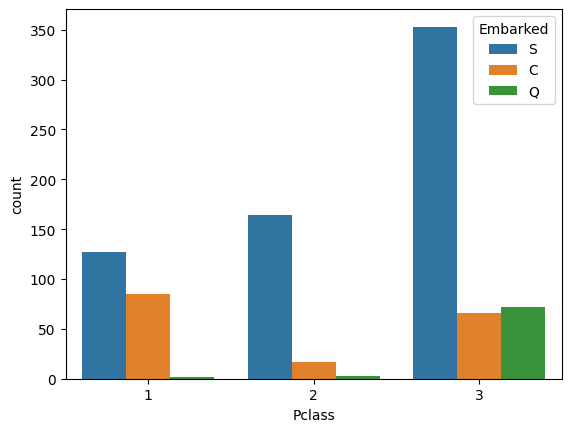

In [1530]:
#plot Pclass and Embarked
sns.countplot(x='Pclass', hue='Embarked', data=df)

<Axes: xlabel='Fare', ylabel='Embarked'>

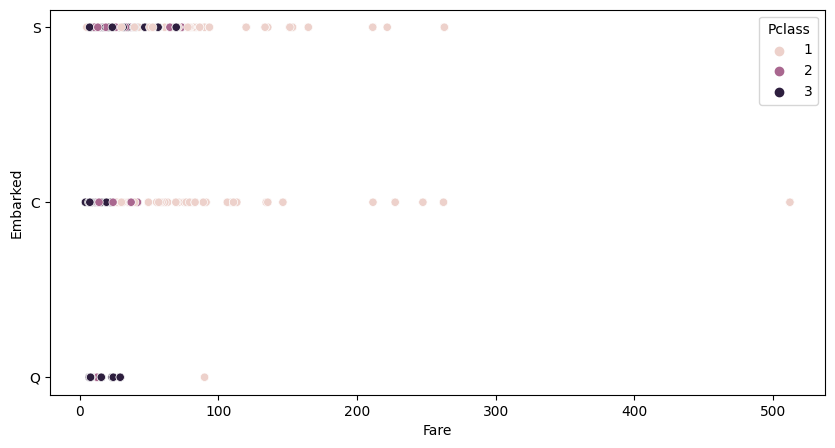

In [1531]:
# scatter plot for fair Vs Pclass and embarkmed
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fare',y='Embarked',hue='Pclass',data=df)

In [1532]:
# average fare values per embarkation groupby Pclass
df.groupby(['Embarked','Pclass'])['Fare'].mean()

Embarked  Pclass
C         1         104.718529
          2          25.358335
          3          11.214083
Q         1          90.000000
          2          12.350000
          3          11.183393
S         1          71.410138
          2          20.803049
          3          14.735301
Name: Fare, dtype: float64

In [1533]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,FirstName,Title,AgeGroup,FamilySize,FamilyCategory,FarePerPerson,CabinLetter
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,2,113572,80.0,B28,NaN,Icard,Amelie,Mrs,Children,2,Medium,40.0,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,2,113572,80.0,B28,NaN,Stone,George Nelson (Martha Evelyn),Mrs,Children,2,Medium,40.0,B


In [1534]:
df['Embarked'].replace(np.nan,'S',inplace=True)

### Outliers

In [1535]:
# Function to handle age outliers for a specific title
def handle_age_outliers_for_title(df, age_group):
    mask = df['AgeGroup'] == age_group
    
    q1 = df.loc[mask, 'Age'].quantile(0.25)
    q3 = df.loc[mask, 'Age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df.loc[mask & (df['Age'] < lower_bound), 'Age'] = lower_bound
    df.loc[mask & (df['Age'] > upper_bound), 'Age'] = upper_bound
    return df

df = handle_age_outliers_for_title(df, 'Adult')
df = handle_age_outliers_for_title(df, 'Children')


In [1536]:
def outliers_using_iqr_fare(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    return df

df = outliers_using_iqr_fare(df, 'Fare')
#df = outliers_using_iqr_fare(df, 'FarePerPerson') 

<Axes: xlabel='Age', ylabel='Fare'>

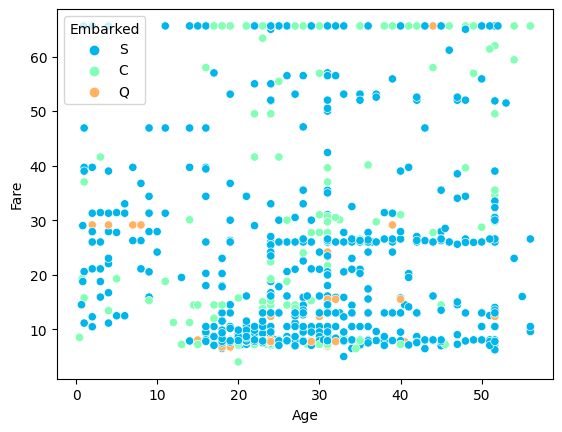

In [1537]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Embarked', palette='rainbow')

In [1538]:
train_df = df.copy()

In [1539]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['PassengerId','Pclass','Name','Sex','Ticket', 'Cabin', 'Embarked','Title', 'FamilyName', 'FirstName','FamilyCategory','AgeGroup','CabinLetter']

lb1 = LabelEncoder()
for col in cat_columns:    
    lb1.fit(list(df[col].values)) 
    df[col] = lb1.transform(list(df[col].values))

In [1540]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['SibSp','Parch','Fare', 'Age', 'FamilySize', 'FarePerPerson']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


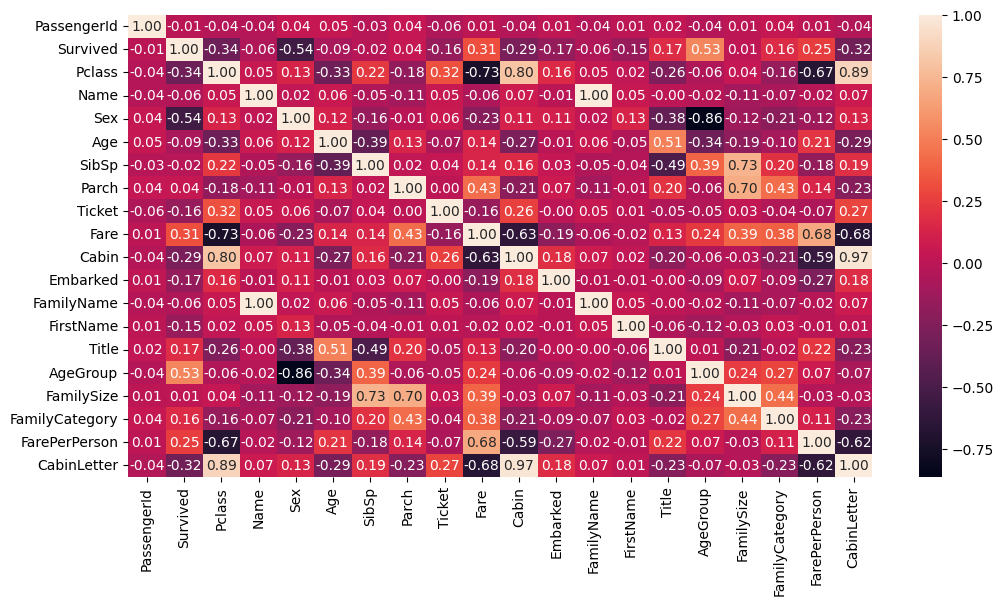

In [1541]:
# correation using pearson method
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt='.2f')
fig.savefig('corr.png')

In [1542]:
X1 = df.drop(['Survived'], axis=1)
y1 = df['Survived']

In [1543]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

k = 10

X_new = SelectKBest(f_regression, k=k).fit_transform(X1,y1)


selected_features = X1.columns[SelectKBest(f_regression, k=k).fit(X1, y1).get_support()]

print(selected_features)

Index(['Pclass', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'AgeGroup', 'FarePerPerson', 'CabinLetter'],
      dtype='object')


In [1544]:
X = train_df[['Sex', 'Pclass','AgeGroup', 'FarePerPerson', 'CabinLetter', 'Fare']]
y = train_df['Survived']

In [1545]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [1546]:
# encode categorical variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



cat_columns = ['Sex', 'Pclass','AgeGroup', 'CabinLetter']

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')  

def encoding_with_one_hot_encoder(data, features):
    fitting_encoder = ohe.fit(data[features]).transform(data[features])
    col_names = ohe.get_feature_names_out(input_features=features)
    encoder_df = pd.DataFrame(fitting_encoder, columns=col_names,
                              index=data.index)
    data = data.join(encoder_df)
    data = data.drop(features, axis=1)
    return data

X_train = encoding_with_one_hot_encoder(X_train, cat_columns)

def encoder_with_transform(data, features):
    fitting_encoder = ohe.transform(data[features])
    col_names = ohe.get_feature_names_out(input_features=features)
    encoder_df = pd.DataFrame(fitting_encoder,
                              columns=col_names,
                              index=data.index)
    data = data.join(encoder_df)
    data = data.drop(features, axis=1)
    return data
    
X_test = encoder_with_transform(X_test, cat_columns)

c:\Users\jatin\.conda\envs\titanic\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1547]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['FarePerPerson','Fare']

st_scaler = StandardScaler()

for col in numerical_cols:
    X_train[col] = st_scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = st_scaler.transform(X_test[col].values.reshape(-1,1))


In [1548]:
# get the best scores from different models
best_scores = []


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score 

# import the best models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


# GridSearchCV and KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


models_dict = {'LogisticRegression': LogisticRegression( solver='liblinear', random_state=0),
                'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=0, max_depth=25, min_samples_leaf=16, min_samples_split=2),
                'XGBClassifier': XGBClassifier( n_estimators=50, max_depth=8, min_child_weight=16, gamma=0.4, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005),
                'SVC': SVC( kernel='rbf', gamma=0.1, C=1.0, random_state=0),
                'HistGradientBoostingClassifier': HistGradientBoostingClassifier( max_iter=100, random_state=42, learning_rate=0.1, max_depth=6, min_samples_leaf=8),
                'GaussianNB': GaussianNB(priors = None, var_smoothing = 1e-09),
                'DecisionTreeClassifier': DecisionTreeClassifier( max_depth=6, min_samples_leaf=8, min_samples_split=8, random_state=0),
                'AdaBoostClassifier': AdaBoostClassifier( n_estimators=100, random_state=0, learning_rate=0.1, algorithm='SAMME.R'),
                'GradientBoostingClassifier': GradientBoostingClassifier( n_estimators=100, random_state=0, learning_rate=0.1, max_depth=6, min_samples_leaf=8, min_samples_split=8, subsample=0.8),
                'ExtraTreesClassifier': ExtraTreesClassifier( n_estimators=100, random_state=0, max_depth=6, min_samples_leaf=8, min_samples_split=8, bootstrap=True, oob_score=True, warm_start=True)}

# create a function to get the best scores from different models
def get_best_scores(models_dict, X_train, y_train, X_test, y_test):
    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy =  accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        best_scores.append([name, accuracy, f1, precision, model])
    return best_scores

get_best_scores(models_dict, X_train, y_train, X_test, y_test)

[['LogisticRegression',
  0.7713004484304933,
  0.7017543859649124,
  0.6976744186046512,
  LogisticRegression(random_state=0, solver='liblinear')],
 ['RandomForestClassifier',
  0.7982062780269058,
  0.7019867549668874,
  0.803030303030303,
  RandomForestClassifier(max_depth=25, min_samples_leaf=16, random_state=0)],
 ['XGBClassifier',
  0.8026905829596412,
  0.7105263157894737,
  0.8059701492537313,
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

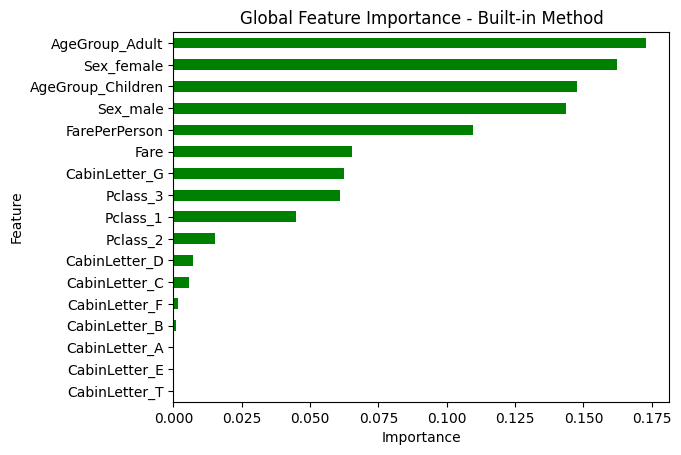

In [1549]:

global_importances = pd.Series(best_scores[1][4].feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

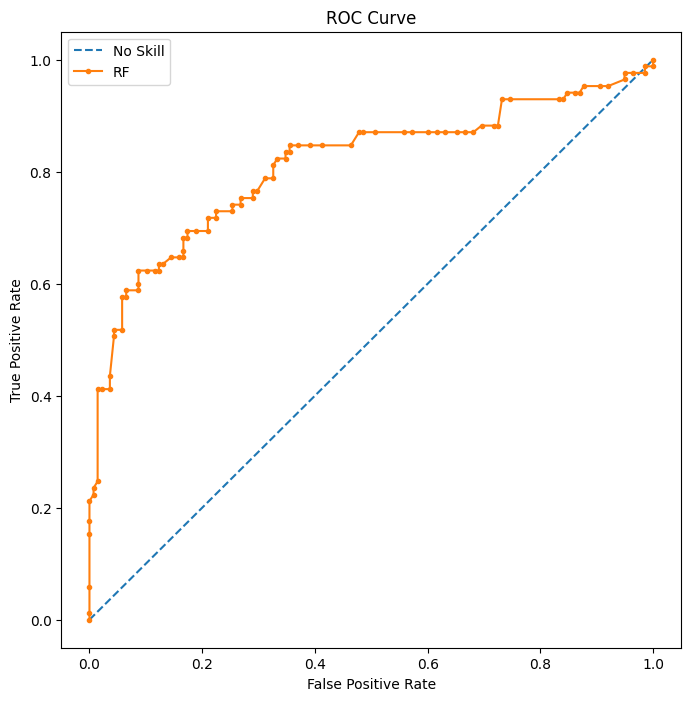

In [1550]:
# plot roc curve for a Logistic Regression model
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

fig, ax = plt.subplots(figsize=(8, 8))
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = best_scores[1][4].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(lr_fpr, lr_tpr, marker='.', label='RF')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
# show the plot
plt.show()
